In [1]:
import os
import time
import pandas as pd
import math

In [2]:
values = pd.read_csv('gyro_record_20190626-153444.csv')
millis = lambda: int(round(time.time() * 100))

In [3]:
values.columns

Index(['time', 'yaw', 'pitch', 'roll', 'acc x', 'acc y', 'acc z'], dtype='object')

In [4]:
data_1 = values[['time', 'yaw', 'pitch', 'roll']]
data_2 = values[['time', 'acc x', 'acc y', 'acc z']]

In [5]:
data_1 = values[['time', 'yaw', 'pitch', 'roll']]
data_2 = values[['time', 'acc x', 'acc y', 'acc z']]
data_1.to_csv('axis_value1', sep='\t', encoding='utf-8')
processed_data_1 = data_1[['time', 'yaw', 'pitch', 'roll']]
data_2.to_csv('axis_value2', sep='\t', encoding='utf-8')
processed_data = data_2[['acc x', 'acc z']]
df = pd.DataFrame(data_2[['acc x', 'acc z']])

In [6]:
import itertools
import csv

estim_1 = []
estim_2 = []
a = 0
i = 0

for i in range(49):
    with open('df_1.csv', 'r') as f:
        data_csv = csv.reader(f)
        a += 49
        for row in itertools.islice(data_csv, a):
            estim_1.append(row)
        print(row[0].split('\t'))
        
    with open('df_2.csv', 'r') as e:
        data_csv_2 = csv.reader(e)
        i += 49
        for s in itertools.islice(data_csv_2, i):
            estim_2.append(s)
        print(s[0].split('\t'))

['47', '2019-06-26 15:34:47.837564', '172.82', '-79.23', '-5.59']
['47', '-4117.0']
['96', '2019-06-26 15:34:48.819811', '165.35', '-78.63', '-7.83']
['48', '-4121.0']
['145', '2019-06-26 15:34:49.799032', '158.78', '-78.19', '-8.86']
['49', '-4128.0']
['194', '2019-06-26 15:34:50.778252', '154.64', '-77.83', '-9.28']
['50', '-4129.0']
['243', '2019-06-26 15:34:51.760483', '152.61', '-77.09', '-9.63']
['51', '-4125.0']
['292', '2019-06-26 15:34:52.739173', '147.65', '-77.57', '-9.7']
['52', '-4125.0']
['341', '2019-06-26 15:34:53.718395', '143.92', '-77.58', '-9.72']
['53', '-4129.0']
['390', '2019-06-26 15:34:54.700615', '140.16', '-77.7', '-9.74']
['54', '-4132.0']
['439', '2019-06-26 15:34:55.679867', '137.14', '-77.71', '-9.73']
['55', '-4129.0']
['488', '2019-06-26 15:34:56.645497', '134.54', '-77.7', '-9.74']
['56', '-4126.0']
['537', '2019-06-26 15:34:57.641663', '132.18', '-77.71', '-9.73']
['57', '-4127.0']
['586', '2019-06-26 15:34:58.620883', '130.18', '-77.72', '-9.71']
['5

In [7]:
import statistics

b_df1 = pd.DataFrame(estim_1)
b_df2 = pd.DataFrame(estim_2)
print(b_df1.mean(axis=1))
print(b_df2.mean(axis=1))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
59995   NaN
59996   NaN
59997   NaN
59998   NaN
59999   NaN
60000   NaN
60001   NaN
60002   NaN
60003   NaN
60004   NaN
60005   NaN
60006   NaN
60007   NaN
60008   NaN
60009   NaN
60010   NaN
60011   NaN
60012   NaN
60013   NaN
60014   NaN
60015   NaN
60016   NaN
60017   NaN
60018   NaN
60019   NaN
60020   NaN
60021   NaN
60022   NaN
60023   NaN
60024   NaN
Length: 60025, dtype: float64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     

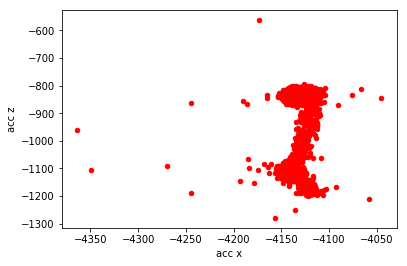

In [16]:
import numpy as np
import matplotlib.pyplot as plt

df.max(level)
df.plot(kind='scatter', x='acc x', y='acc z', color='red')
plt.show()

In [9]:
from sklearn import tree

X = [df['acc x']]
Y = [df['acc z']]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)

In [15]:
graph = graphviz.Source(dot_data)
graph.render('df')

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'df'], make sure the Graphviz executables are on your systems' PATH

In [51]:
"""
a = 0

for i in range(337):
    with open('df_1.csv', 'r') as f:
        data_csv = csv.reader(f)
        a += 49
        for row in itertools.islice(data_csv, a):
            print(row)
            df.update(row)
            d = df['acc x'].max()
        print(d)
        """

def max_value():        
    with open('gyro_record_20190626-153444.csv', 'r') as f:
        lines = f.readlines()[1:]
        for bucket in range(0, len(lines) - 49, 49):
            x = []
            y = []
            for idx in range(bucket, bucket + 49):
                line = lines[idx].split(',')
                x.append(float(line[4]))
            q = max(x)
            y.append(q)
            print(y)
            print(max(x))
    
def min_value('gyro_record_20190626-153444.csv', 'r') as f:
    
    with open()

[-4045.0]
-4045.0
[-4120.0]
-4120.0
[-4108.0]
-4108.0
[-4120.0]
-4120.0
[-4103.0]
-4103.0
[-4058.0]
-4058.0
[-4121.0]
-4121.0
[-4117.0]
-4117.0
[-4125.0]
-4125.0
[-4127.0]
-4127.0
[-4131.0]
-4131.0
[-4124.0]
-4124.0
[-4126.0]
-4126.0
[-4131.0]
-4131.0
[-4126.0]
-4126.0
[-4114.0]
-4114.0
[-4109.0]
-4109.0
[-4114.0]
-4114.0
[-4120.0]
-4120.0
[-4119.0]
-4119.0
[-4117.0]
-4117.0
[-4117.0]
-4117.0
[-4116.0]
-4116.0
[-4118.0]
-4118.0
[-4111.0]
-4111.0
[-4119.0]
-4119.0
[-4105.0]
-4105.0
[-4123.0]
-4123.0
[-4118.0]
-4118.0
[-4121.0]
-4121.0
[-4116.0]
-4116.0
[-4119.0]
-4119.0
[-4111.0]
-4111.0
[-4116.0]
-4116.0
[-4119.0]
-4119.0
[-4117.0]
-4117.0
[-4126.0]
-4126.0
[-4117.0]
-4117.0
[-4120.0]
-4120.0
[-4110.0]
-4110.0
[-4114.0]
-4114.0
[-4118.0]
-4118.0
[-4114.0]
-4114.0
[-4117.0]
-4117.0
[-4113.0]
-4113.0
[-4120.0]
-4120.0
[-4110.0]
-4110.0
[-4114.0]
-4114.0
[-4113.0]
-4113.0
[-4122.0]
-4122.0
[-4114.0]
-4114.0
[-4109.0]
-4109.0
[-4116.0]
-4116.0
[-4111.0]
-4111.0
[-4124.0]
-4124.0
[-4114.0]
